In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch, RegularPolygon
from matplotlib import cm, colors
import matplotlib

import numpy as np
import pandas as pd

import os
import scanpy as sc

In [2]:
import scipy.stats as stats

In [3]:
harmo = pd.read_csv("/home/comp/cszrwang/project/GMGAT4Deconv/figures/mean_out_mela_20_seed1.model.csv")

In [4]:
coordinates = pd.read_csv("/home/comp/cszrwang/data/Melanoma/Mel_cor.txt",delimiter='\t')
coordinates

x     y
0     7.0  15.0
1     7.0  16.0
2     7.0  17.0
3     7.0  18.0
4     8.0  13.0
..    ...   ...
288  27.0  18.0
289  27.0  19.0
290  27.0  20.0
291  27.0  21.0
292  27.0  22.0

[293 rows x 2 columns]

In [6]:
from sklearn.metrics import adjusted_rand_score

# Assuming your clustering output is named 'clustering_output' and ground truth is named 'ground_truth'
clustering_output = [1, 2, 1, 1, 2, 2, 0]
ground_truth = [0, 1, 0, 0, 1, 1, 2]

# Calculate the ARI
ari = adjusted_rand_score(ground_truth, clustering_output)

# Print the ARI
print("ARI:", ari)

ARI: 1.0


In [12]:
def k_means(df, k):
    # Perform k-means clustering
    kmeans = KMeans(n_clusters=k, random_state=0)
    clusters = kmeans.fit_predict(df)

    # Perform one-hot encoding on the cluster labels
    encoder = OneHotEncoder(sparse=False)
    cluster_vectors = encoder.fit_transform(clusters.reshape(-1, 1))
    
    # Get the numeric cluster labels
    numeric_labels = kmeans.labels_

    # Display the cluster vectors
    return cluster_vectors, numeric_labels

In [13]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder

In [14]:
import warnings

# Disable all warning messages
warnings.filterwarnings("ignore")
def draw_pie(dist, xpos, ypos, size, colors, ax):

    cumsum = np.cumsum(dist)
    cumsum = cumsum/ cumsum[-1]
    pie = [0] + cumsum.tolist()
    i = 0
    for r1, r2 in zip(pie[:-1], pie[1:]):
        angles = np.linspace(2 * np.pi * r1, 2 * np.pi * r2, num=100)
        x = [0] + np.cos(angles).tolist()
        y = [0] + np.sin(angles).tolist()

        xy = np.column_stack([x, y])
        ax.scatter([xpos], [ypos], marker=xy, s=size, c=colors[i], edgecolors='none')
        i += 1

    return ax

def plot_frac_results(predict, cell_type_list, coordinates, file_name=None, point_size=1000, size_coefficient=0.0009, if_show=True, color_dict=None):
    
    coordinates.columns = ['coor_X', 'coor_Y']
    labels = cell_type_list
    if color_dict != None:
        colors = []
        for i in cell_type_list:
            colors.append(color_dict[i])
    else:
        if len(labels) <= 10:
            colors = plt.rcParams["axes.prop_cycle"].by_key()['color'][:len(labels)]
        else:
            import matplotlib
            color = plt.get_cmap('rainbow', len(labels))
            colors = []
            for x in color([range(len(labels))][0]):
                colors.append(matplotlib.colors.to_hex(x, keep_alpha=False))
    
    str_len = 0
    for item in cell_type_list:
        str_len = max(str_len, len(item))
    extend_region = str_len/15+1
    
    
    fig, ax = plt.subplots(figsize=(len(coordinates['coor_X'].unique())*point_size*size_coefficient+extend_region, len(coordinates['coor_Y'].unique())*point_size*size_coefficient))
    
    for i in tqdm(range(predict.shape[0]), desc="Plotting pie plots:"):
        ax = draw_pie(predict[i], coordinates['coor_X'].values[i], coordinates['coor_Y'].values[i], 
                                              size=point_size, ax=ax, colors=colors)
        
    for spine in ax.spines.values():
        spine.set_edgecolor('lightgrey')  # Set edge line color of all spines to grey
    
    
    patches = [mpatches.Patch(color=colors[i], label="{:s}".format(labels[i]) ) for i in range(len(colors))]
    fontsize = max(predict.shape[0]/100, 10)
    fontsize = min(fontsize, 30)
    ax.legend(handles=patches, fontsize=fontsize, bbox_to_anchor=(1, 1), loc="upper left")
    plt.axis("equal")
#     plt.edgecolors("lightgrey")
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()
    if file_name != None:
        plt.savefig(file_name, 
                    dpi=300, 
#                     bbox_inches='tight'
                   )
    if if_show == True:
        plt.show()
    plt.close('all')
    
    
    
def plot_scatter_by_type(predict, cell_type_list, coordinates, point_size=400, size_coefficient=0.0009, file_path=None, if_show=True):
    
    coordinates.columns = ['coor_X', 'coor_Y']
    
    for i in tqdm(range(len(cell_type_list)), desc="Plotting cell type scatter plot:"):
        
        fig, ax = plt.subplots(figsize=(len(coordinates['coor_X'].unique())*point_size*size_coefficient+1, len(coordinates['coor_Y'].unique())*point_size*size_coefficient))
        cm = plt.cm.get_cmap('Reds')
        ax = plt.scatter(coordinates['coor_X'], coordinates['coor_Y'], s=point_size, vmin=0, vmax=1, c=predict[:, i], cmap=cm)

        cbar = plt.colorbar(ax, fraction=0.05)
        labelsize = max(predict.shape[0]/100, 10)
        labelsize = min(labelsize, 30)
        cbar.ax.tick_params(labelsize=labelsize)
        plt.axis("equal")
        plt.xticks([])
        plt.yticks([])
        plt.xlim(coordinates['coor_X'].min()-0.5, coordinates['coor_X'].max()+0.5)
        plt.ylim(coordinates['coor_Y'].min()-0.5, coordinates['coor_Y'].max()+0.5)
        plt.tight_layout()
        if file_path != None:
            name = cell_type_list[i].replace('/', '_')
            plt.savefig(file_path+'/{}.jpg'.format(name), dpi=300, bbox_inches='tight')
        if if_show == True:
            plt.show()
        plt.close('all')

In [7]:
color_dict = {'B': '#a5c500', 'CAF': '#810061', 'Endo': '#303600', 'Macro': '#ec6400',
             'Mal': '#d4c78c','NK': '#5ec6f2','T': '#717a83'}

In [8]:
import matplotlib.patches as mpatches
from tqdm.notebook import tqdm

In [10]:
cell_type_list = harmo.columns.to_list()
output_dir = "/home/comp/cszrwang/results/Deconvolution/results/Melanoma/Figures/"

In [15]:
## manually sort by excels
harmo = pd.read_csv("/home/comp/cszrwang/project/HarmoDecon/outputs/mela/mean_out_mela_20_seed1.model.csv")
harmo = harmo.loc[:,np.unique(harmo.columns)]
cluster_vectors, numeric_labels = k_means(harmo, 4)

Plotting pie plots::   0%|          | 0/293 [00:00<?, ?it/s]

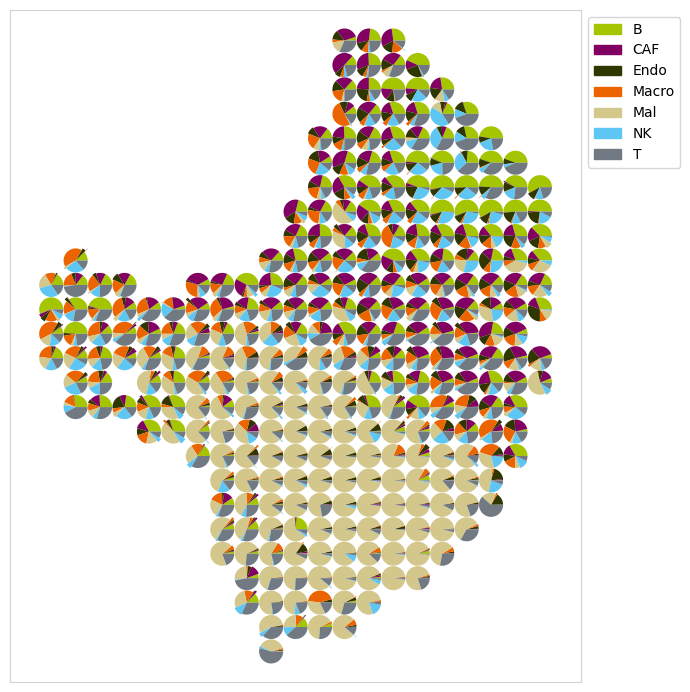

In [16]:
plot_frac_results(np.array(harmo), cell_type_list, coordinates, point_size=300, size_coefficient=0.0009
                  , file_name=output_dir+'/harmo_results_pie_plot.jpg', color_dict=color_dict)

In [18]:
color_dict_domain = {'2': '#2899AA', '3': '#CBDFC5', '0': '#F4CD7E', '1': '#1F3950'}
domain_list = ['0', '1', '2', '3']

In [19]:
k_means_df_filter = pd.DataFrame(cluster_vectors, columns=[i for i in range(len(cluster_vectors[0]))])
# k_means_df_filter = k_means_df[~nan_indices]
k_means_df_filter.columns = color_dict_domain.keys()

Plotting pie plots::   0%|          | 0/293 [00:00<?, ?it/s]

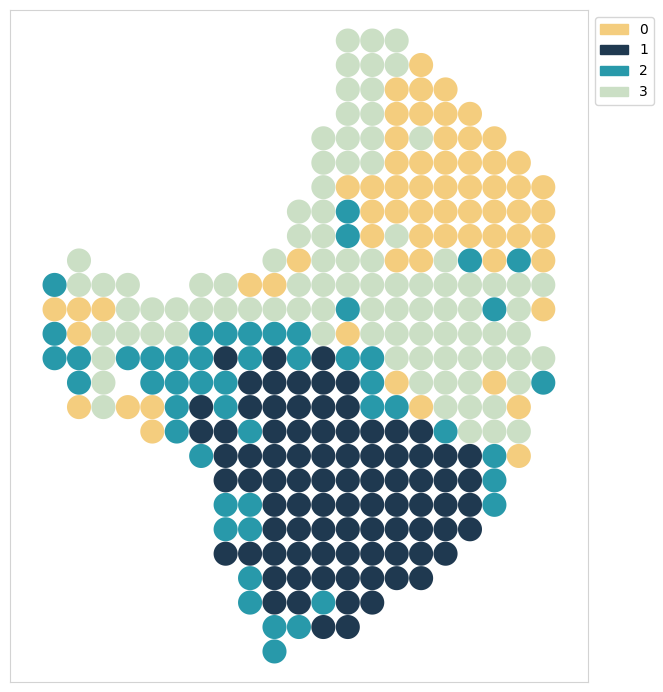

In [20]:
plot_frac_results(np.array(k_means_df_filter), domain_list, coordinates, point_size=300, size_coefficient=0.0009
                  , file_name=output_dir+'/harmo_domains_pie_plot.jpg', color_dict=color_dict_domain)

In [21]:
## manually sort by excels
card = pd.read_csv("/home/comp/cszrwang/results/Deconvolution/results/Melanoma/CARD/CARD_output.csv")
card = card.loc[:,np.unique(card.columns)]
cluster_vectors, numeric_labels = k_means(card, 4)

Plotting pie plots::   0%|          | 0/292 [00:00<?, ?it/s]

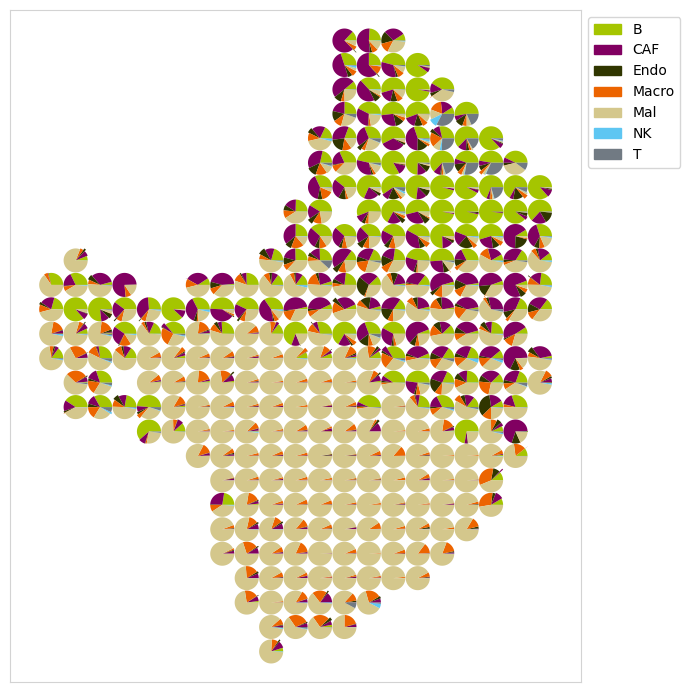

In [22]:
plot_frac_results(np.array(card), cell_type_list, coordinates.drop(141), point_size=300, size_coefficient=0.0009
                  , file_name=output_dir+'/card_results_pie_plot.jpg', color_dict=color_dict)

In [23]:
k_means_df_filter = pd.DataFrame(cluster_vectors, columns=[i for i in range(len(cluster_vectors[0]))])
# k_means_df_filter = k_means_df[~nan_indices]
k_means_df_filter.columns = color_dict_domain.keys()

Plotting pie plots::   0%|          | 0/292 [00:00<?, ?it/s]

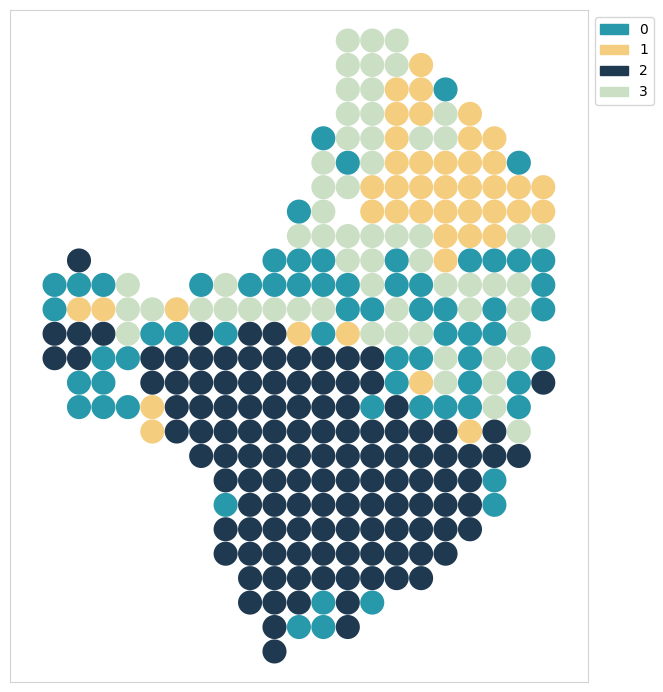

In [24]:
color_dict_domain = {'0': '#2899AA', '1': '#F4CD7E', '2': '#1F3950', '3': '#CBDFC5'}
plot_frac_results(np.array(k_means_df_filter), domain_list, coordinates.drop(141), point_size=300, size_coefficient=0.0009
                  , file_name=output_dir+'/card_domains_pie_plot.jpg', color_dict=color_dict_domain)

In [25]:
## manually sort by excels
rctd = pd.read_csv("/home/comp/cszrwang/results/Deconvolution/results/Melanoma/RCTD/RCTD_output.csv", index_col=0)
rctd = rctd.loc[:,np.unique(rctd.columns)]
cluster_vectors, numeric_labels = k_means(rctd, 4)

Plotting pie plots::   0%|          | 0/292 [00:00<?, ?it/s]

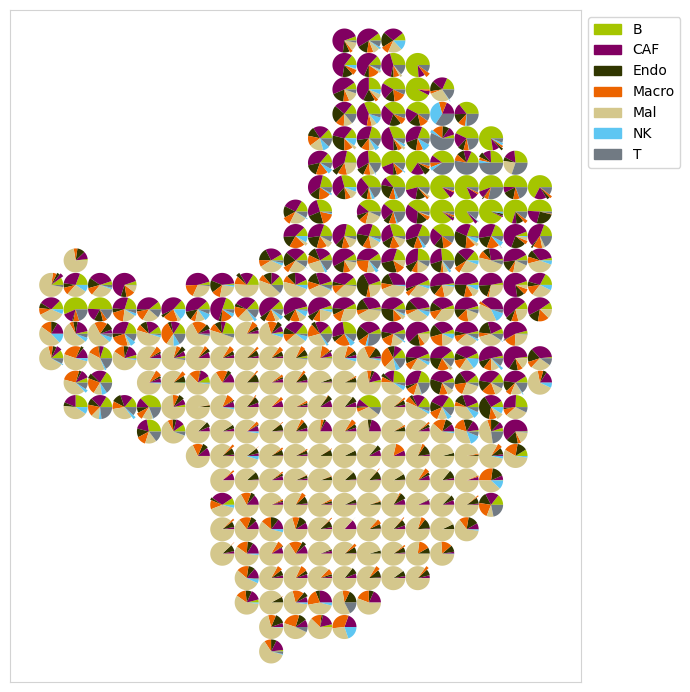

In [26]:
plot_frac_results(np.array(rctd), cell_type_list, coordinates.drop(141), point_size=300, size_coefficient=0.0009
                  , file_name=output_dir+'/rctd_results_pie_plot.jpg', color_dict=color_dict)

In [27]:
k_means_df_filter = pd.DataFrame(cluster_vectors, columns=[i for i in range(len(cluster_vectors[0]))])
# k_means_df_filter = k_means_df[~nan_indices]
k_means_df_filter.columns = color_dict_domain.keys()

Plotting pie plots::   0%|          | 0/292 [00:00<?, ?it/s]

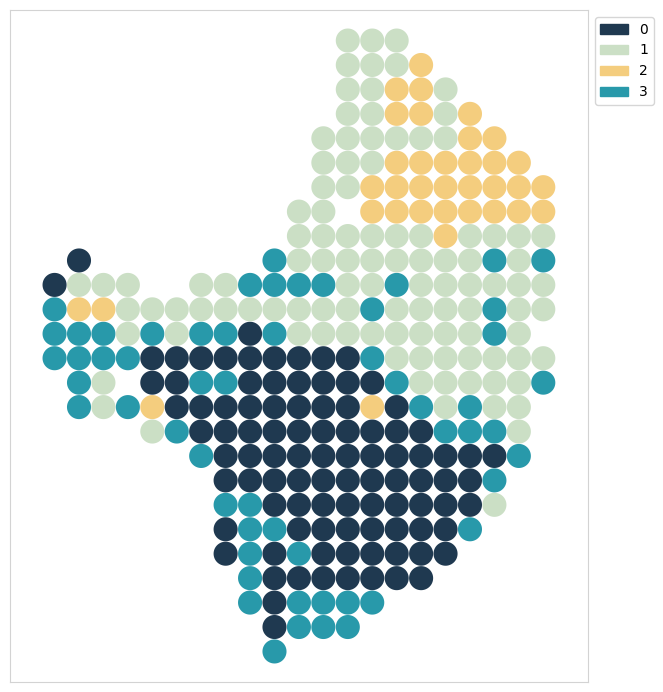

In [28]:
color_dict_domain = {'0': '#1F3950', '1':'#CBDFC5', '2': '#F4CD7E', '3': '#2899AA'}
plot_frac_results(np.array(k_means_df_filter), domain_list, coordinates.drop(141), point_size=300, size_coefficient=0.0009
                  , file_name=output_dir+'/rctd_domains_pie_plot.jpg', color_dict=color_dict_domain)

In [29]:
## manually sort by excels
spacel = pd.read_csv("/home/comp/cszrwang/results/Deconvolution/results/Melanoma/SPACEL/SPACEL_result.csv", index_col=0)
spacel = spacel.loc[:,np.unique(spacel.columns)]
cluster_vectors, numeric_labels = k_means(spacel, 4)

Plotting pie plots::   0%|          | 0/293 [00:00<?, ?it/s]

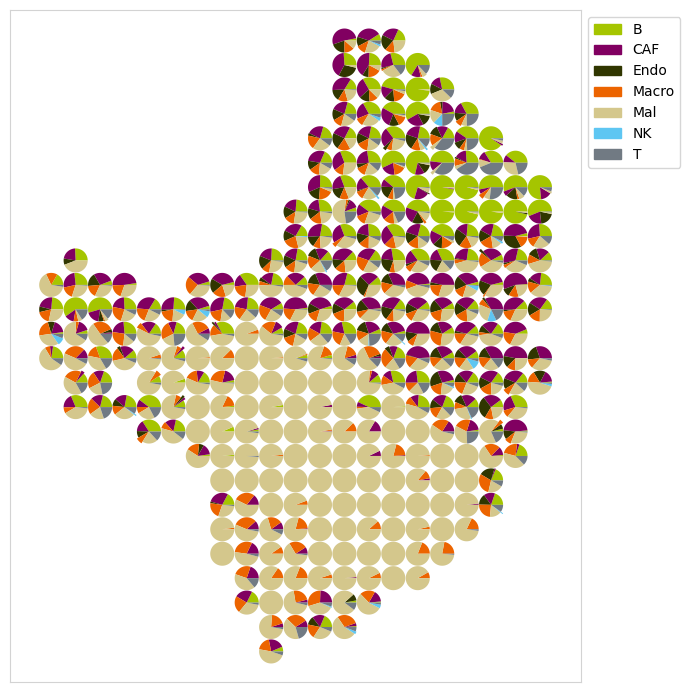

In [30]:
plot_frac_results(np.array(spacel), cell_type_list, coordinates, point_size=300, size_coefficient=0.0009
                  , file_name=output_dir+'/spacel_results_pie_plot.jpg', color_dict=color_dict)

In [31]:
k_means_df_filter = pd.DataFrame(cluster_vectors, columns=[i for i in range(len(cluster_vectors[0]))])
# k_means_df_filter = k_means_df[~nan_indices]
k_means_df_filter.columns = color_dict_domain.keys()

Plotting pie plots::   0%|          | 0/293 [00:00<?, ?it/s]

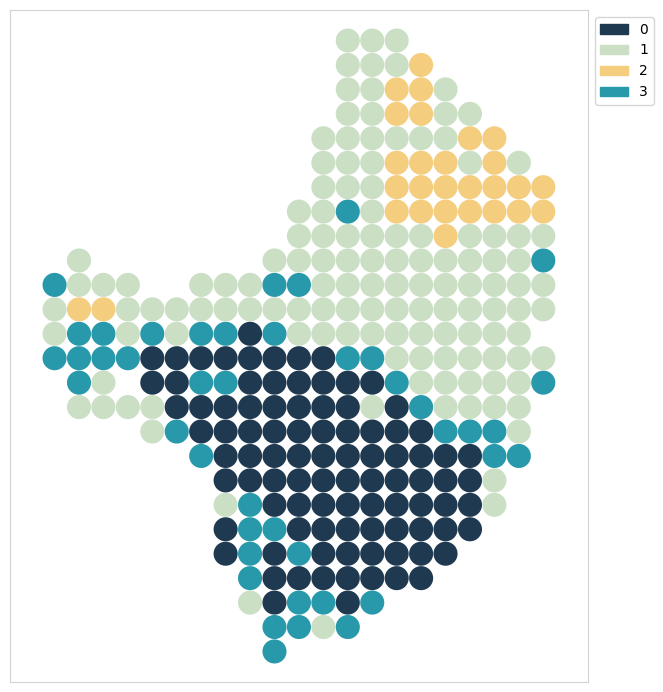

In [32]:
color_dict_domain = {'0': '#1F3950', '1':'#CBDFC5', '2': '#F4CD7E', '3': '#2899AA'}
plot_frac_results(np.array(k_means_df_filter), domain_list, coordinates, point_size=300, size_coefficient=0.0009
                  , file_name=output_dir+'/spacel_domains_pie_plot.jpg', color_dict=color_dict_domain)

In [33]:
## manually sort by excels
dwls = pd.read_csv("/home/comp/cszrwang/results/Deconvolution/results/Melanoma/SpatialDWLS/SpatialDWLS_result.csv", index_col=0)
dwls = dwls.loc[:,np.unique(harmo.columns)]
cluster_vectors, numeric_labels = k_means(dwls, 4)

Plotting pie plots::   0%|          | 0/293 [00:00<?, ?it/s]

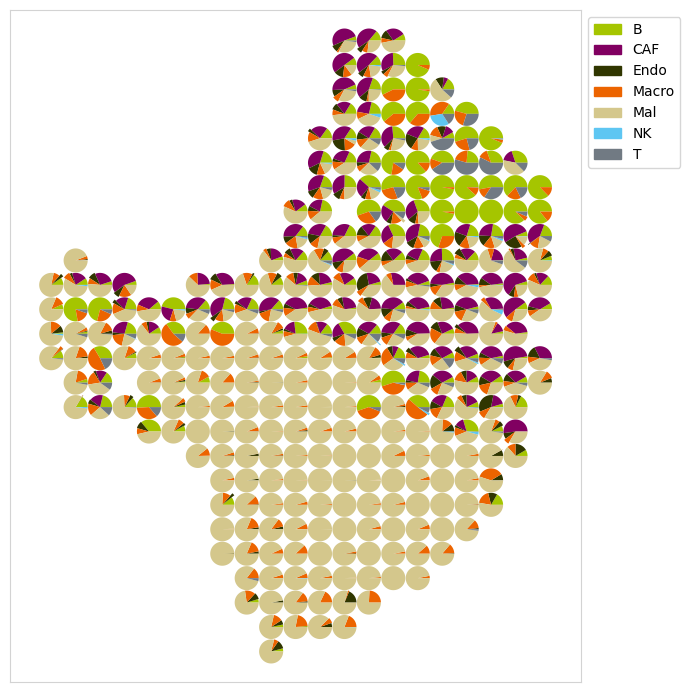

In [34]:
plot_frac_results(np.array(dwls), cell_type_list, coordinates, point_size=300, size_coefficient=0.0009
                  , file_name=output_dir+'/dwls_results_pie_plot.jpg', color_dict=color_dict)

In [35]:
k_means_df_filter = pd.DataFrame(cluster_vectors, columns=[i for i in range(len(cluster_vectors[0]))])
# k_means_df_filter = k_means_df[~nan_indices]
k_means_df_filter.columns = color_dict_domain.keys()

Plotting pie plots::   0%|          | 0/293 [00:00<?, ?it/s]

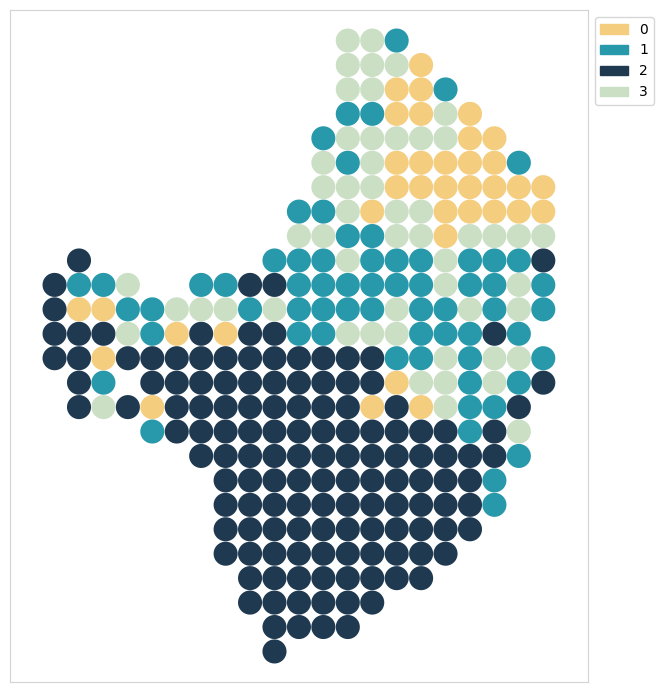

In [36]:
color_dict_domain = {'0': '#F4CD7E', '1':'#2899AA', '2': '#1F3950', '3': '#CBDFC5'}
plot_frac_results(np.array(k_means_df_filter), domain_list, coordinates, point_size=300, size_coefficient=0.0009
                  , file_name=output_dir+'/dwls_domains_pie_plot.jpg', color_dict=color_dict_domain)

In [37]:
## manually sort by excels
std = pd.read_csv("/home/comp/cszrwang/results/Deconvolution/results/Melanoma/StdGCN/predict_result.csv", index_col=0)
std = std.loc[:,np.unique(harmo.columns)]
cluster_vectors, numeric_labels = k_means(std, 4)

Plotting pie plots::   0%|          | 0/293 [00:00<?, ?it/s]

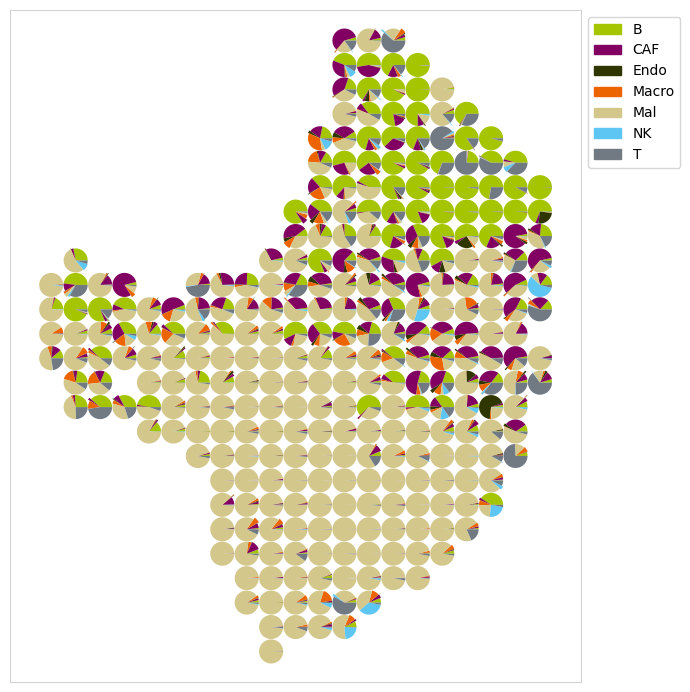

In [38]:
plot_frac_results(np.array(std), cell_type_list, coordinates, point_size=300, size_coefficient=0.0009
                  , file_name=output_dir+'/std_results_pie_plot.jpg', color_dict=color_dict)

In [39]:
k_means_df_filter = pd.DataFrame(cluster_vectors, columns=[i for i in range(len(cluster_vectors[0]))])
# k_means_df_filter = k_means_df[~nan_indices]
k_means_df_filter.columns = color_dict_domain.keys()

Plotting pie plots::   0%|          | 0/293 [00:00<?, ?it/s]

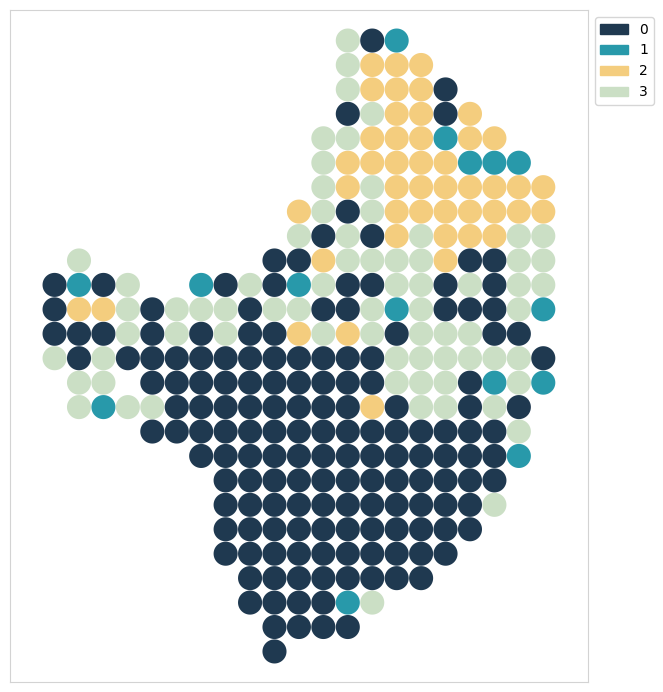

In [40]:
color_dict_domain = {'0': '#1F3950', '1':'#2899AA', '2': '#F4CD7E', '3': '#CBDFC5'}
plot_frac_results(np.array(k_means_df_filter), domain_list, coordinates, point_size=300, size_coefficient=0.0009
                  , file_name=output_dir+'/std_domains_pie_plot.jpg', color_dict=color_dict_domain)

In [41]:
## manually sort by excels
red = pd.read_csv("/home/comp/cszrwang/results/Deconvolution/results/Melanoma/Redeconve/Redeconve.csv", index_col=0)
red = red.loc[:,np.unique(harmo.columns)]
cluster_vectors, numeric_labels = k_means(red, 4)

Plotting pie plots::   0%|          | 0/293 [00:00<?, ?it/s]

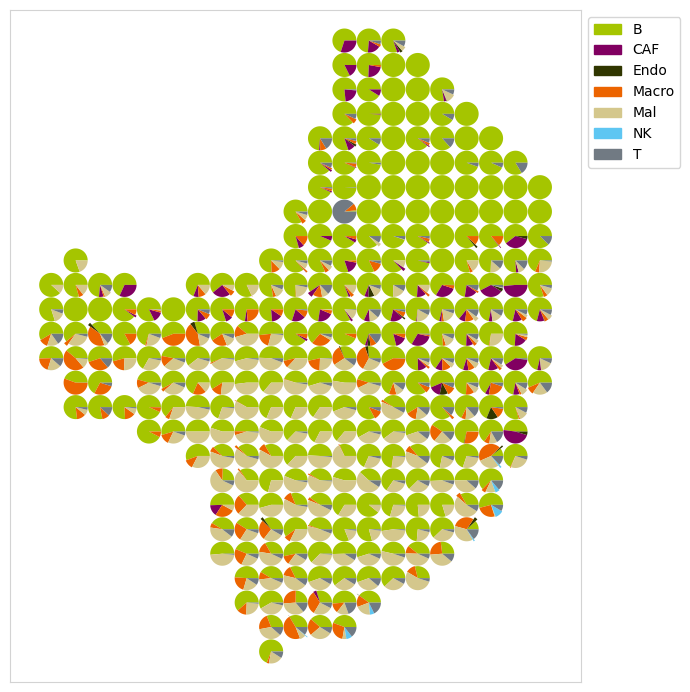

In [42]:
plot_frac_results(np.array(red), cell_type_list, coordinates, point_size=300, size_coefficient=0.0009
                  , file_name=output_dir+'/red_results_pie_plot.jpg', color_dict=color_dict)

In [44]:
k_means_df_filter = pd.DataFrame(cluster_vectors, columns=[i for i in range(len(cluster_vectors[0]))])
# k_means_df_filter = k_means_df[~nan_indices]
k_means_df_filter.columns = color_dict_domain.keys()

Plotting pie plots::   0%|          | 0/293 [00:00<?, ?it/s]

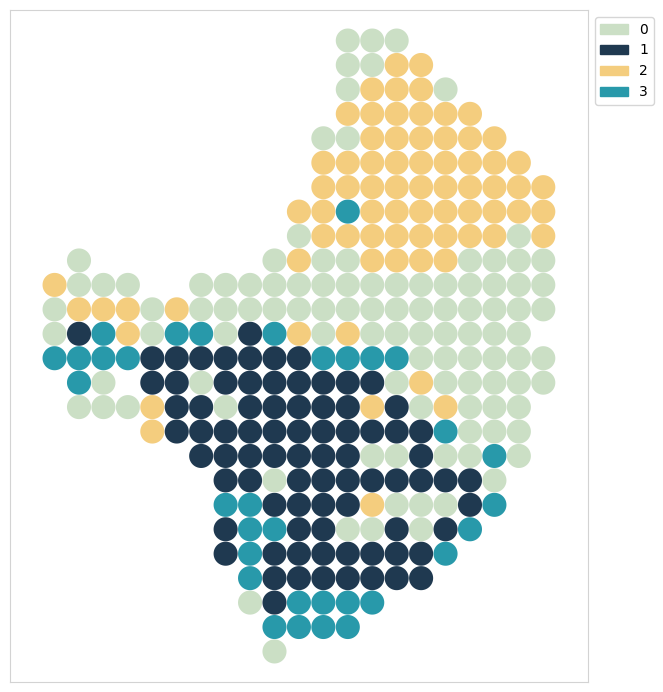

In [45]:
color_dict_domain = {'0': '#CBDFC5', '1':'#1F3950', '2': '#F4CD7E', '3': '#2899AA'}
plot_frac_results(np.array(k_means_df_filter), domain_list, coordinates, point_size=300, size_coefficient=0.0009
                  , file_name=output_dir+'/red_domains_pie_plot.jpg', color_dict=color_dict_domain)

In [56]:
## manually sort by excels
cell2location = pd.read_csv("/home/comp/cszrwang/results/Deconvolution/results/Melanoma/Cell2location/Cell2location_result.csv", index_col=0)
cell2location = cell2location.loc[:,np.unique(cell2location.columns)]
cluster_vectors, numeric_labels = k_means(cell2location, 4)

Plotting pie plots::   0%|          | 0/293 [00:00<?, ?it/s]

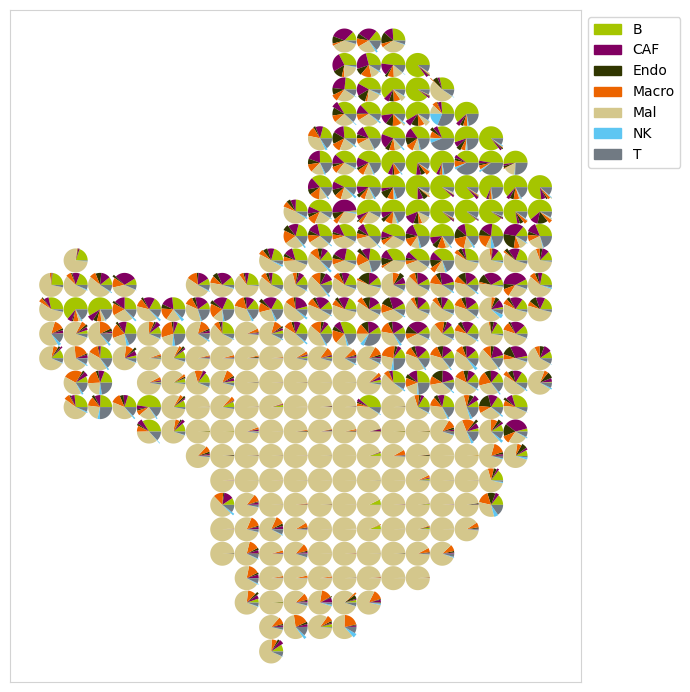

In [57]:
plot_frac_results(np.array(cell2location), cell_type_list, coordinates, point_size=300, size_coefficient=0.0009
                  , file_name=output_dir+'/cell2location_results_pie_plot.jpg', color_dict=color_dict)

In [58]:
k_means_df_filter = pd.DataFrame(cluster_vectors, columns=[i for i in range(len(cluster_vectors[0]))])
# k_means_df_filter = k_means_df[~nan_indices]
k_means_df_filter.columns = color_dict_domain.keys()

Plotting pie plots::   0%|          | 0/293 [00:00<?, ?it/s]

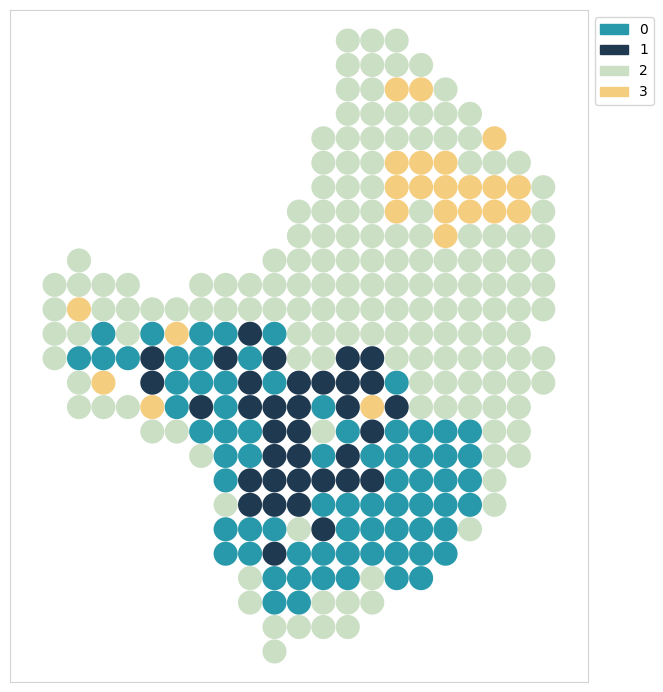

In [59]:
color_dict_domain = {'2': '#CBDFC5', '1':'#1F3950', '3': '#F4CD7E', '0': '#2899AA'}
plot_frac_results(np.array(k_means_df_filter), domain_list, coordinates, point_size=300, size_coefficient=0.0009
                  , file_name=output_dir+'/cell2_domains_pie_plot.jpg', color_dict=color_dict_domain)

In [53]:
## manually sort by excels
dstg = pd.read_csv("/home/comp/cszrwang/results/Deconvolution/results/Melanoma/DSTG/predict_output.csv", index_col=0)
dstg = dstg.loc[:,np.unique(dstg.columns)]
cluster_vectors, numeric_labels = k_means(dstg, 4)

Plotting pie plots::   0%|          | 0/293 [00:00<?, ?it/s]

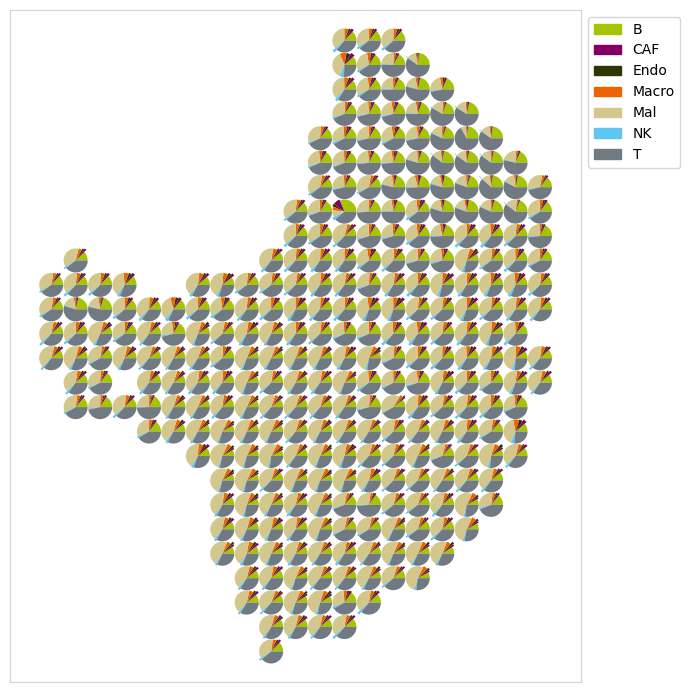

In [28]:
plot_frac_results(np.array(dstg), cell_type_list, coordinates, point_size=300, size_coefficient=0.0009
                  , file_name=output_dir+'/dstg_results_pie_plot.jpg', color_dict=color_dict)

In [54]:
k_means_df_filter = pd.DataFrame(cluster_vectors, columns=[i for i in range(len(cluster_vectors[0]))])
# k_means_df_filter = k_means_df[~nan_indices]
k_means_df_filter.columns = color_dict_domain.keys()

Plotting pie plots::   0%|          | 0/293 [00:00<?, ?it/s]

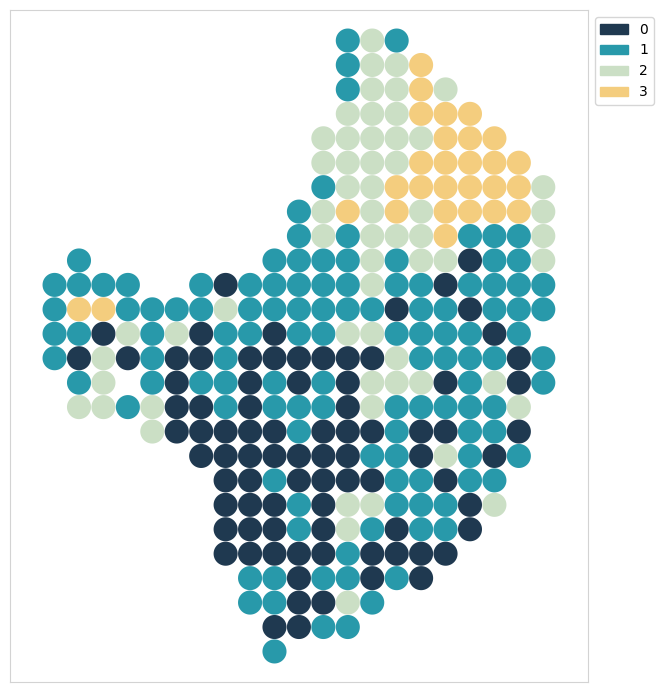

In [55]:
color_dict_domain = {'2': '#CBDFC5', '0':'#1F3950', '3': '#F4CD7E', '1': '#2899AA'}
plot_frac_results(np.array(k_means_df_filter), domain_list, coordinates, point_size=300, size_coefficient=0.0009
                  , file_name=output_dir+'/dstg_domains_pie_plot.jpg', color_dict=color_dict_domain)

In [40]:
## manually sort by excels
tangram = pd.read_csv("/home/comp/cszrwang/results/Deconvolution/results/Melanoma/Tangram/Tangram_result.csv", index_col=0)
tangram = tangram.loc[:,np.unique(tangram.columns)]
cluster_vectors, numeric_labels = k_means(tangram, 4)

Plotting pie plots::   0%|          | 0/293 [00:00<?, ?it/s]

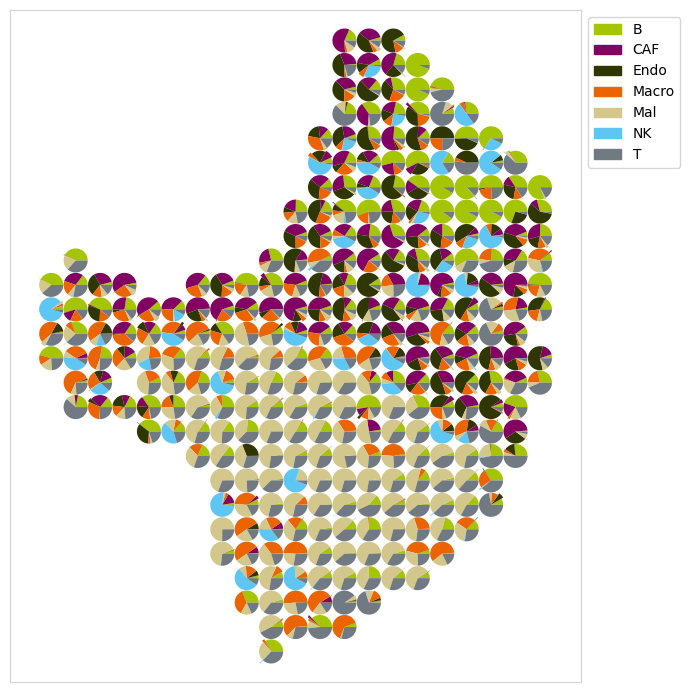

In [41]:
plot_frac_results(np.array(tangram), cell_type_list, coordinates, point_size=300, size_coefficient=0.0009
                  , file_name=output_dir+'/tangram_results_pie_plot.jpg', color_dict=color_dict)

In [42]:
k_means_df_filter = pd.DataFrame(cluster_vectors, columns=[i for i in range(len(cluster_vectors[0]))])
# k_means_df_filter = k_means_df[~nan_indices]
k_means_df_filter.columns = color_dict_domain.keys()

Plotting pie plots::   0%|          | 0/293 [00:00<?, ?it/s]

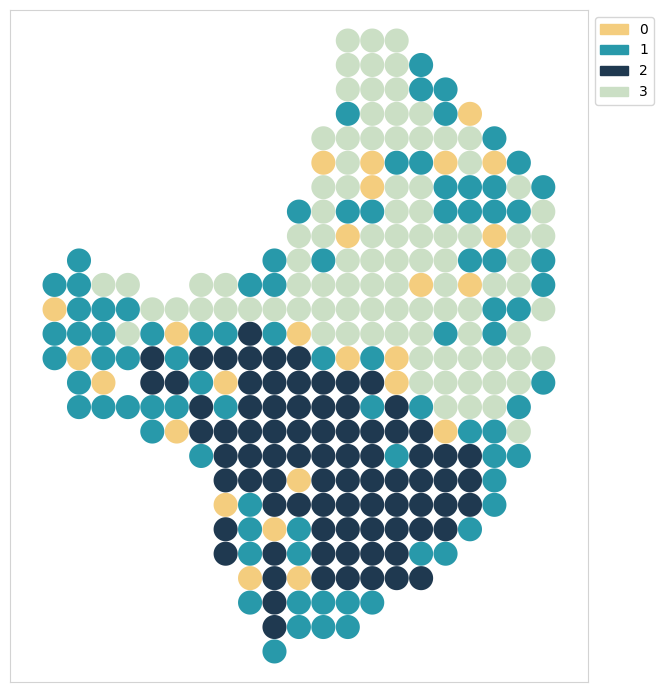

In [44]:
color_dict_domain = {'3': '#CBDFC5', '2':'#1F3950', '0': '#F4CD7E', '1': '#2899AA'}
plot_frac_results(np.array(k_means_df_filter), domain_list, coordinates, point_size=300, size_coefficient=0.0009
                  , file_name=output_dir+'/tangram_domains_pie_plot.jpg', color_dict=color_dict_domain)

In [50]:
## manually sort by excels
stereoscope = pd.read_csv("/home/comp/cszrwang/results/Deconvolution/results/Melanoma/Stereoscope/Stereoscope_result.csv", index_col=0)
stereoscope = stereoscope.loc[:,np.unique(stereoscope.columns)]
cluster_vectors, numeric_labels = k_means(stereoscope, 4)

Plotting pie plots::   0%|          | 0/293 [00:00<?, ?it/s]

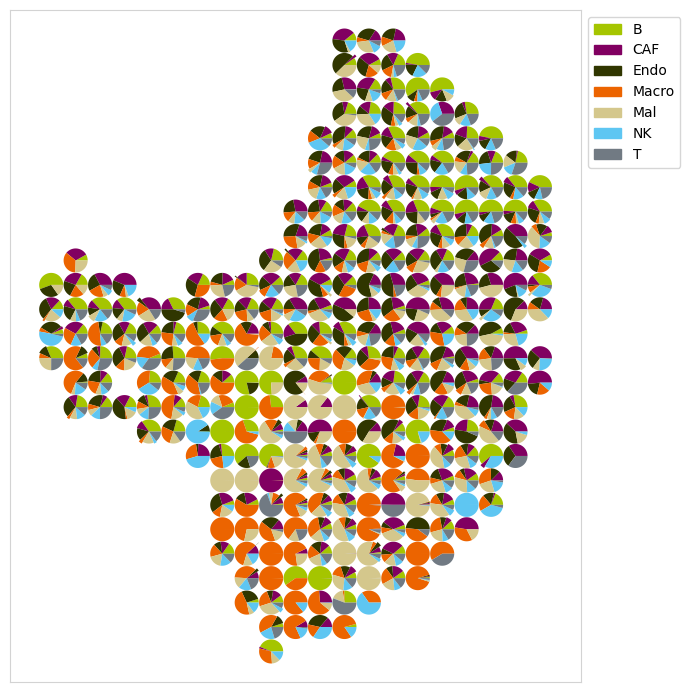

In [38]:
plot_frac_results(np.array(stereoscope), cell_type_list, coordinates, point_size=300, size_coefficient=0.0009
                  , file_name=output_dir+'/stereoscope_results_pie_plot.jpg', color_dict=color_dict)

In [51]:
k_means_df_filter = pd.DataFrame(cluster_vectors, columns=[i for i in range(len(cluster_vectors[0]))])
# k_means_df_filter = k_means_df[~nan_indices]
k_means_df_filter.columns = color_dict_domain.keys()

Plotting pie plots::   0%|          | 0/293 [00:00<?, ?it/s]

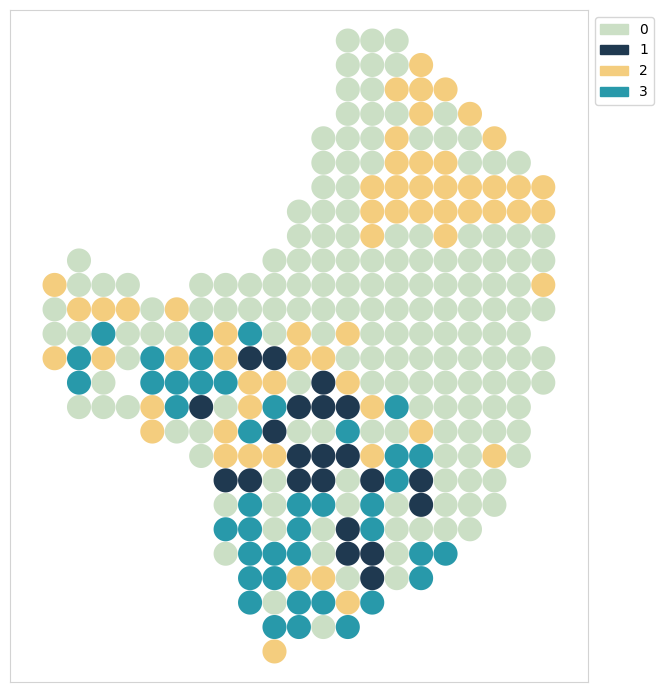

In [52]:
color_dict_domain = {'0': '#CBDFC5', '1':'#1F3950', '2': '#F4CD7E', '3': '#2899AA'}
plot_frac_results(np.array(k_means_df_filter), domain_list, coordinates, point_size=300, size_coefficient=0.0009
                  , file_name=output_dir+'/stereoscope_domains_pie_plot.jpg', color_dict=color_dict_domain)

In [45]:
## manually sort by excels
spotlight = pd.read_csv("/home/comp/cszrwang/results/Deconvolution/results/Melanoma/SPOTlight/SPOTlight_output.csv", index_col=0)
spotlight = spotlight.loc[:,np.unique(spotlight.columns)]
cluster_vectors, numeric_labels = k_means(spotlight, 4)

In [46]:
spotlight

B       CAF      Endo     Macro       Mal        NK         T
1    0.000000  0.212362  0.136380  0.178733  0.374444  0.000000  0.098081
2    0.000000  0.195673  0.140370  0.216465  0.286965  0.089636  0.070892
3    0.039101  0.253535  0.099493  0.165113  0.268929  0.000000  0.173830
4    0.016548  0.140265  0.124792  0.127638  0.407607  0.032197  0.150953
5    0.000000  0.238737  0.085122  0.248503  0.233422  0.010539  0.183677
..        ...       ...       ...       ...       ...       ...       ...
289  0.000000  0.252470  0.149701  0.173251  0.251474  0.103216  0.069887
290  0.015257  0.273654  0.109398  0.157709  0.352285  0.091698  0.000000
291  0.000000  0.369517  0.141869  0.160111  0.133535  0.000000  0.194969
292  0.200658  0.301056  0.367374  0.130912  0.000000  0.000000  0.000000
293  0.228297  0.239867  0.142464  0.170734  0.078276  0.000000  0.140362

[293 rows x 7 columns]

Plotting pie plots::   0%|          | 0/293 [00:00<?, ?it/s]

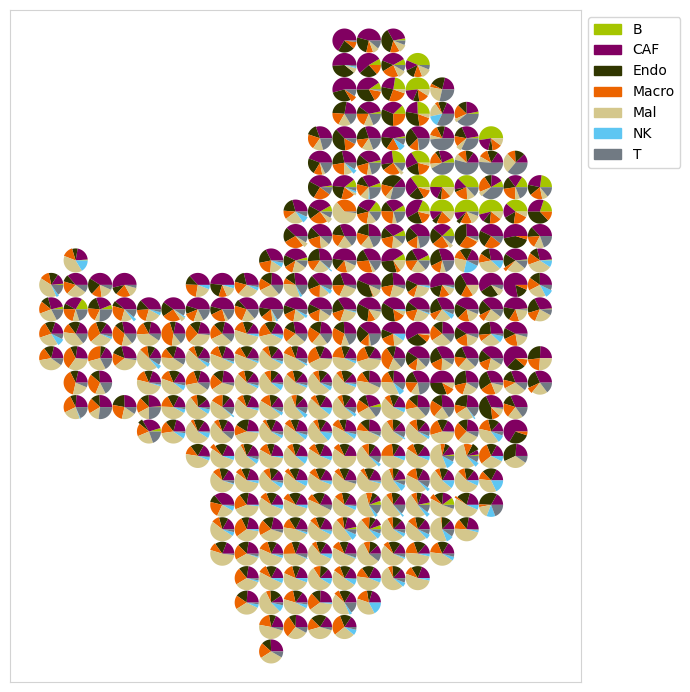

In [47]:
plot_frac_results(np.array(spotlight), cell_type_list, coordinates, point_size=300, size_coefficient=0.0009
                  , file_name=output_dir+'/spotlight_results_pie_plot.jpg', color_dict=color_dict)

In [48]:
k_means_df_filter = pd.DataFrame(cluster_vectors, columns=[i for i in range(len(cluster_vectors[0]))])
# k_means_df_filter = k_means_df[~nan_indices]
k_means_df_filter.columns = color_dict_domain.keys()

Plotting pie plots::   0%|          | 0/293 [00:00<?, ?it/s]

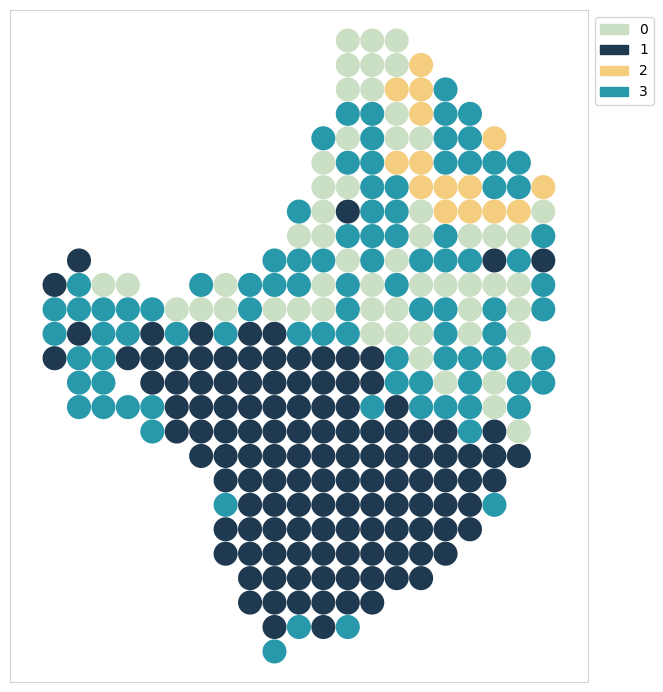

In [49]:
color_dict_domain = {'0': '#CBDFC5', '1':'#1F3950', '2': '#F4CD7E', '3': '#2899AA'}
plot_frac_results(np.array(k_means_df_filter), domain_list, coordinates, point_size=300, size_coefficient=0.0009
                  , file_name=output_dir+'/spotlight_domains_pie_plot.jpg', color_dict=color_dict_domain)